In [35]:
import numpy as np
import matplotlib.pyplot as plt


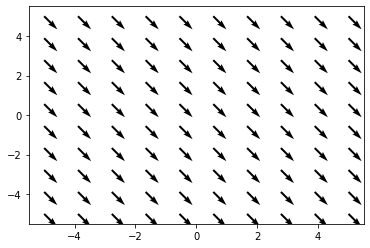

In [36]:
GRID = {'min':-5,
        'max':5,
        'steps':10}

def space(grid):
    try:
        return np.linspace(grid['min'],grid['max'],grid['steps'])
    except:
        return np.linspace(grid[0],grid[1],grid[2])
def plot_field(u,v):
    x,y = np.meshgrid(np.linspace(GRID['min'],GRID['max'],GRID['steps']),np.linspace(GRID['min'],GRID['max'],GRID['steps']))
    plt.quiver(x,y,u,v)
    plt.show()

plot_field(1,-1)

In [47]:
def square(n,density=1):
    return space([-n,n,n*density*2])

def thetadot(x):
    return 3+np.cos(2*x)

def theta2dot(x,y):
    return -2*y*np.sin(2*x)

x,y = np.meshgrid(space([0,10,10]),space[0,10,10])

u = y
v = theta2dot(x,y)

plt.quiver(x,y,u,v)
plt.show()


TypeError: 'function' object is not subscriptable

C:\Users\Allegra\AppData\Local\Temp/ipykernel_15304/946486538.py:12: RuntimeWarning: invalid value encountered in true_divide
  u,v = u/colors,v/colors


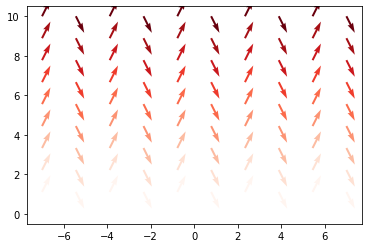

In [57]:
# colorizing stuff
import matplotlib.cm as cm
from matplotlib.colors import Normalize
colormap = cm.Reds

x,y = np.meshgrid(space([-7,7,10]),space([0,10,10]))

u = y
v = theta2dot(x,y)

colors = np.hypot(u,v)
u,v = u/colors,v/colors
plt.quiver(x,y,u,v,colors,cmap=colormap)
plt.show()